### Predicting Heart Disease Project

* World health organization estimates that 17.9 million people die from cardiovascular disease every year.
* There are multiple risk facctors that contribute to CVD in a individual such as unhealthy diet, lack of physical acitivity or mental illness. 
* The goal is to identify these risk factors early and prevent many premature deaths.
* The data set includes relevant information for each patient including whether they have had heart disease before.
* The task is to predict the likelihood of a new patient having heart disease.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
heartd_df = pd.read_csv("heart_disease_prediction.csv")

In [49]:
heartd_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


## Data Exploration

In [50]:
print(heartd_df.shape)

(918, 12)


In [51]:
heartd_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [52]:
heartd_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* The average age of a patient from the above analysis is 53. 
* RestingBP, Cholesterol, FastingBS and HeartDisese minimum is 0.00 which does not seem quite right.


In [53]:
#check the null values for the data set
heartd_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is data with null values as shown above

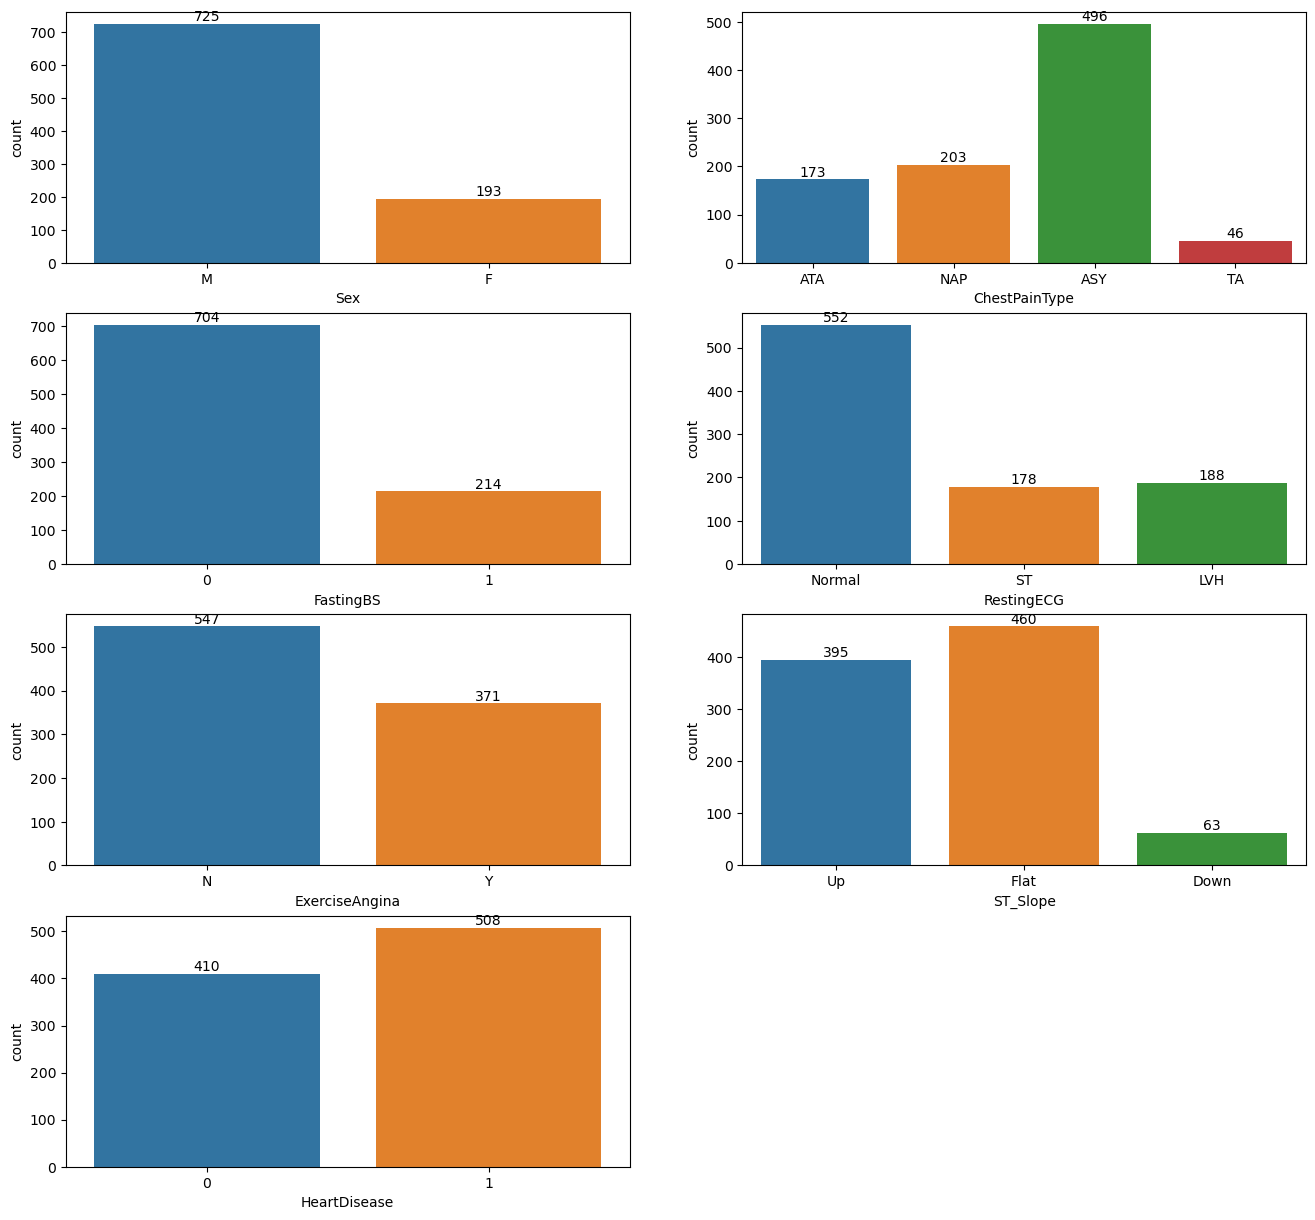

In [54]:
#display the bar charts for the columns
catergorical_col = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]
fig = plt.figure(figsize = (16,15))
for idx,cat in enumerate(catergorical_col):
    ax = plt.subplot(4,2,idx+1)
    ax = sns.countplot(x = cat, data = heartd_df)
    for container in ax.containers:
        ax.bar_label(container)

* From the above bar chart there is 725 male patients and 193 female patients. The data set consists of more males 725 compared to females.  
* There is high number of patients 704 with fasting blood suger less than 120mg/dl
* From the ChestPaintype bar chart there is 496 high number of people from Asymptomatic chest pain type.

### The categorical graphs against the HeartDisease Column.

Grouping the catergorical columns by Heart Disease to get a better idea about the data distribution.

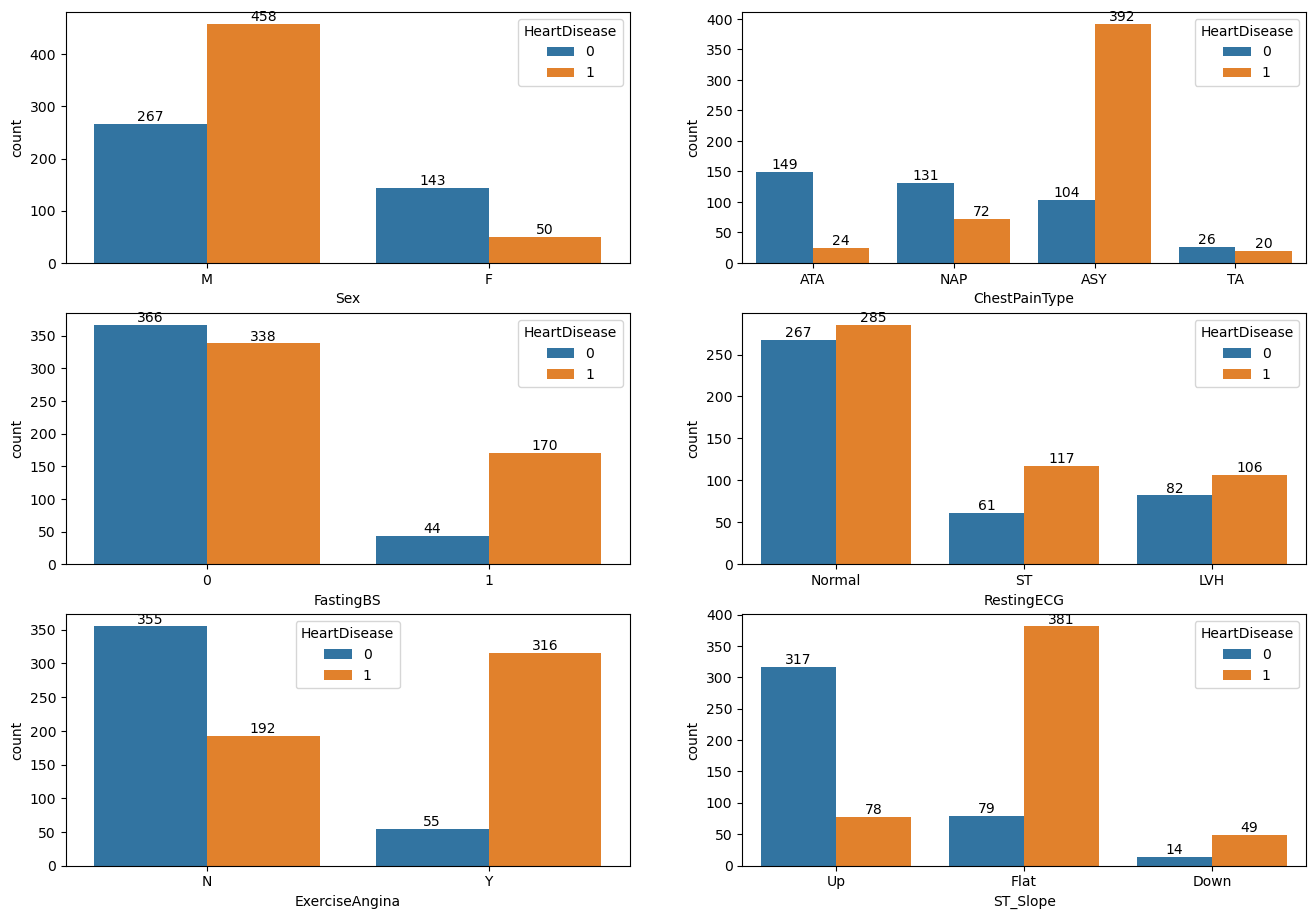

In [55]:
catergorical_col = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]
fig = plt.figure(figsize = (16,15))

for idx,col in enumerate(catergorical_col):
    ax = plt.subplot(4,2,idx+1)
    ax = sns.countplot(x=heartd_df[col], hue = 'HeartDisease', data = heartd_df)
    for container in ax.containers:
        ax.bar_label(container)

* From the above graphs we can see that high number of males have had heart disease compared to females. 
* From the ChestPainType there is 392 people with heart disease from Asymptomatic.
* There is high number of people who had exercise-induced angina (316) were diagonosed with heart disease. 
* There is high number of people(381) with heart disease for ST_Slope flat.

### The percentage of male patients with heart disease with above 50 years old.

In [56]:
above_50 = heartd_df[(heartd_df['Sex'] == 'M') & (heartd_df['Age'] > 50)]

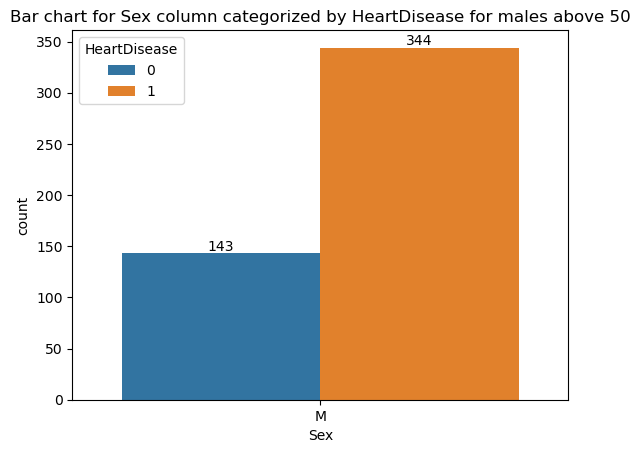

In [57]:
ax = sns.countplot(x='Sex', hue = 'HeartDisease', data = above_50)
ax.set_title("Bar chart for Sex column categorized by HeartDisease for males above 50")
for container in ax.containers:
    ax.bar_label(container)

From the above graph we can see that there is a high count 344 males who has HeartDisease and are above 50 years old

### Data Cleaning

#### Removing outliers

From data exploration above there were not missing values. However there were some zero vlues for RestingBP and Cholesterol. we will further explore this and clean the data for accuracy.

In [58]:
# The number of rows that have 0 value for RestingBP
restingBP_num = heartd_df[heartd_df['RestingBP'] == 0]['RestingBP']
restingBP_num

449    0
Name: RestingBP, dtype: int64

In [59]:
# The number of rows that have 0 value for Cholesterol
cholesterol_num = heartd_df[heartd_df['Cholesterol'] == 0]['Cholesterol']
cholesterol_num

293    0
294    0
295    0
296    0
297    0
      ..
514    0
515    0
518    0
535    0
536    0
Name: Cholesterol, Length: 172, dtype: int64

We will remove the RestingBP value with zero since there is only one row. For the Cholesterol we will replace the zero values with median for the HeartDisease 1 and HeartDisease 0.

In [60]:
#remove the RestingBP that is 0 value
df_clean = heartd_df[heartd_df['RestingBP'] != 0]

In [61]:
#The median age of patients who were diagnosed with heart disease.
choles_with_heartd = df_clean[df_clean['HeartDisease'] == 1]['Cholesterol'].median()
choles_without_heartd = df_clean[df_clean['HeartDisease'] == 0]['Cholesterol'].median()

In [62]:
heartdisease_mask = df_clean['HeartDisease'] == 0
df_clean.loc[heartdisease_mask,'Cholesterol']  = df_clean.loc[heartdisease_mask,'Cholesterol'].replace(0,choles_without_heartd)
df_clean.loc[~heartdisease_mask,'Cholesterol'] = df_clean.loc[~heartdisease_mask,'Cholesterol'].replace(0,choles_with_heartd)

In [63]:
df_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


#### Graph of the age of patients diagnosed with heart disease.

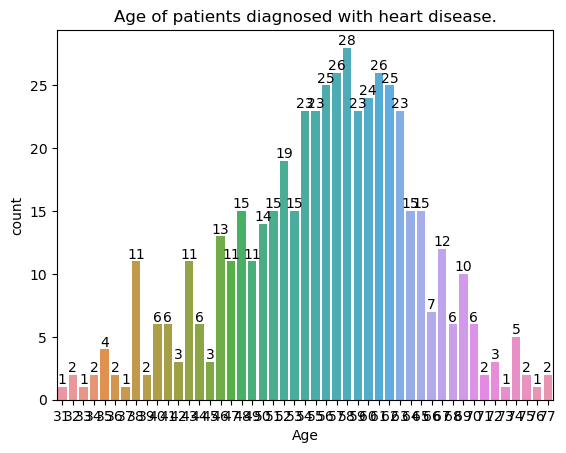

In [64]:
heartd_df_1 = df_clean[df_clean["HeartDisease"] == 1]
ax = sns.countplot(x='Age', data = heartd_df_1)
ax.set_title("Age of patients diagnosed with heart disease.")
for container in ax.containers:
    ax.bar_label(container)

#### Graph of the age of patients.

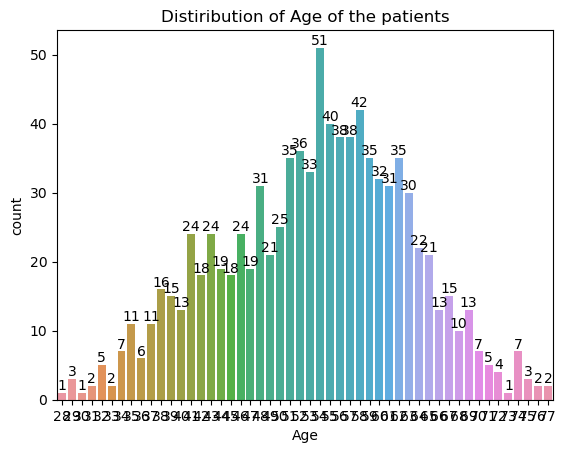

In [65]:
ax = sns.countplot(x='Age', data = df_clean)
ax.set_title("Distiribution of Age of the patients")
for container in ax.containers:
    ax.bar_label(container)

### Feature Selection
Below are some of the feature we will be starting with
* Age
* Sex
* ChestPainType
* Cholesterol
* FastingBS

We will also use graph to see how these columns are correlated with the target column.
We will convert the categorical columns to dummy variables.

In [66]:
df_dummies = pd.get_dummies(df_clean,  drop_first = True)

In [67]:
df_dummies.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1


Text(0.5, 1.0, 'correlation between the features')

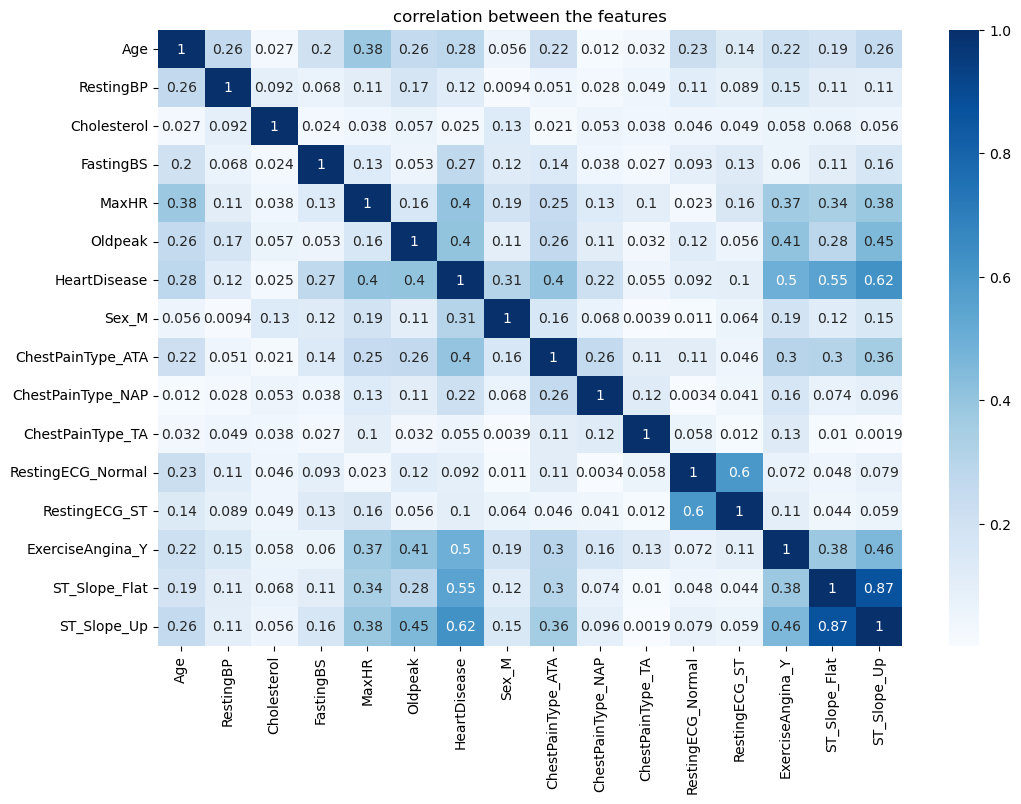

In [68]:
df_corr = abs(df_dummies.corr())
plt.figure(figsize = (12,8))
sns.heatmap(df_corr, annot = True, cmap ='Blues')
plt.title('correlation between the features')

<AxesSubplot:>

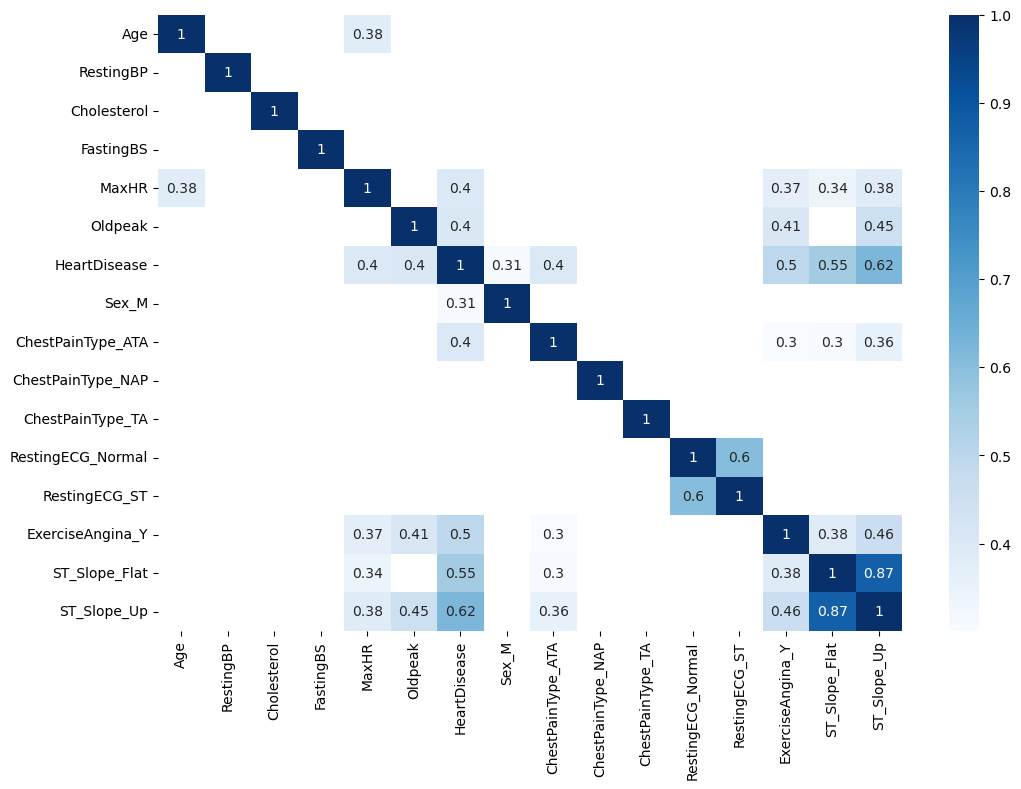

In [69]:
plt.figure(figsize = (12,8))
sns.heatmap(df_corr[df_corr > 0.3], annot = True, cmap = 'Blues')

From the above grpah we can see that the below features are positively correlated with HeartDisease
* ST_Slope_Up
* ST_Slope_Flat
* ExerciseAngina_Y
* ChestPainType_ATA
* OldPeak
* MaxHR

We will now narrow down the features we will will be using as below.
* Oldpeak
* Sex_M
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up


### Building KNeighborsclassifier with one feature

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [71]:
X_df = df_dummies.drop(['HeartDisease'], axis = 1)
y = df_clean['HeartDisease']

X_train, X_val, y_train,y_val = train_test_split(X_df,y,test_size = 0.2, random_state = 147)

In [72]:
features_list = ['Oldpeak','Sex_M','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']

In [73]:
for feature in features_list:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]],y_val)
    
    print(f"The KNN trained on {feature} and with K=3 has an accuracy of {accuracy * 100:.2f}%")

The KNN trained on Oldpeak and with K=3 has an accuracy of 63.04%
The KNN trained on Sex_M and with K=3 has an accuracy of 70.11%
The KNN trained on ExerciseAngina_Y and with K=3 has an accuracy of 55.43%
The KNN trained on ST_Slope_Flat and with K=3 has an accuracy of 44.57%
The KNN trained on ST_Slope_Up and with K=3 has an accuracy of 79.89%


### Building the Classifier with Multiple Features

In [74]:
scaler = MinMaxScaler()

In [75]:
X_train_scaled = scaler.fit_transform(X_train[features_list])
X_val_scaled = scaler.fit_transform(X_val[features_list])

In [76]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train_scaled,y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f'Accuracy:{accuracy * 100:.2f}%')

Accuracy:82.07%


The model's accuracy is 82.07% for all features when K = 4.


### Hyperparameter Tuning

In [77]:
X = df_dummies.drop(["HeartDisease"], axis = 1)
y = df_dummies["HeartDisease"]

scaler = MinMaxScaler()
features = ["Oldpeak","Sex_M","ExerciseAngina_Y","ST_Slope_Flat","ST_Slope_Up"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 417)

X_train_Sc = scaler.fit_transform(X_train[features])
X_test_Sc = scaler.fit_transform(X_test[features])

We will use grid search to explore the for some of the hyper parameters.

* For K - n_neighbors value we will use the values in range of 1 to 20
* Distance metrics minkwoski and manhattan will be used. minkwoski is the default metrcis for KNeighborsClassifier.

In [78]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1,21))
param_grid = dict(n_neighbors = k_range)
knn_grid = GridSearchCV(knn,param_grid, cv = 10, scoring = 'accuracy')

In [79]:
grid_search = knn_grid.fit(X_train_Sc,y_train)

In [80]:
accuracy = grid_search.best_score_ * 100
print(accuracy)
best_param = grid_search.best_params_
print(best_param)

83.55977355977356
{'n_neighbors': 20}


The model has a accuracy of 83.56% with 20 n_neighbors and minkowski as the distance metric.

### Model Evaluation on Test Set

In [81]:
predictions = knn_grid.best_estimator_.predict(X_test_Sc)
accuracy = accuracy_score(y_test, predictions)
print(f'Model accuracy for test set is {accuracy*100:.2f}%')

Model accuracy for test set is 82.61%


### Summary

Following features were used to train our final model

* Oldpeak
* Sex_M
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

We had a test accuracy of 82.61% but wih some of the limitations of our data set this might not be indicative of a well performing model.